Unzipping all Datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#for unzip
from zipfile import ZipFile
file_name="/content/drive/MyDrive/project/DataSet.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
#for unzip
from zipfile import ZipFile
file_name="/content/drive/MyDrive/project/Augmented_Dataset2.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
#for unzip
from zipfile import ZipFile
file_name="/content/drive/MyDrive/project/Augmented_Dataset.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
#for unzip
from zipfile import ZipFile
file_name="/content/drive/MyDrive/project/Test_Data.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
#for unzip
from zipfile import ZipFile
file_name="/content/drive/MyDrive/project/Test_Data_1.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


Training on Dataset 1

In [ ]:
!pip install split-folders

import splitfolders

# Your dataset directory
data_dir = '/content/DataSet'

# Split into 50% train, 30% val, 20% test
splitfolders.ratio(data_dir,
                   output="Train_Dataset_1",
                   seed=42,
                   ratio=(0.5,0.3,0.2))

Copying files: 3400 files [00:36, 92.43 files/s] 


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/Train_Dataset_1/train',
    labels='inferred',
    label_mode='int',
    batch_size=16,
    image_size=(256,256),
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/Train_Dataset_1/val',
    labels='inferred',
    label_mode='int',
    batch_size=16,
    shuffle=False,
    image_size=(256,256),
)
test_ds=keras.utils.image_dataset_from_directory(
    directory='/content/Train_Dataset_1/test',
    labels='inferred',
    label_mode='int',
    batch_size=16,
    shuffle=False,
    image_size=(256,256),
)

Found 1700 files belonging to 2 classes.
Found 1020 files belonging to 2 classes.
Found 680 files belonging to 2 classes.


In [ ]:
#Normalize
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)
test_ds=test_ds.map(process)

In [ ]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(512,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 4,097,089 (15.63 MB)

 Trainable params: 4,095,105 (15.62 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [ ]:
history=model.fit(train_ds,epochs=30,validation_data=validation_ds)

Epoch 1/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.6417 - loss: 2.5375 - val_accuracy: 0.4696 - val_loss: 2.7032
Epoch 2/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 219s 2s/step - accuracy: 0.7504 - loss: 1.5256 - val_accuracy: 0.5098 - val_loss: 1.1969
Epoch 3/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - accuracy: 0.7594 - loss: 1.0906 - val_accuracy: 0.5069 - val_loss: 2.3191
Epoch 4/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - accuracy: 0.7939 - loss: 0.9383 - val_accuracy: 0.5745 - val_loss: 0.9394
Epoch 5/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 263s 2s/step - accuracy: 0.8237 - loss: 0.7090 - val_accuracy: 0.8255 - val_loss: 0.6687
Epoch 6/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 266s 2s/step - accuracy: 0.8412 - loss: 0.7324 - val_accuracy: 0.5755 - val_loss: 1.3506
Epoch 7/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 213s 2s/step - accuracy: 0.8541 - loss: 0.6156 - val_accuracy: 0.8784 - val_loss: 0.5649
Epoch 8/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 197s 2s/step - accuracy: 0.8342 - loss: 0.6944 - val_accu

In [ ]:
from keras.models import load_model
model.save('GLD_Binary_Classification.h5')

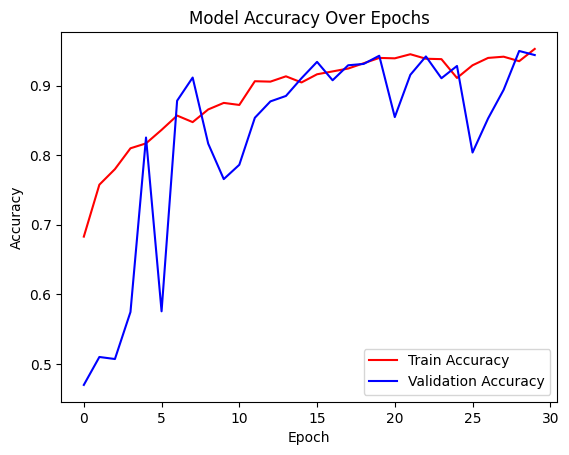

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

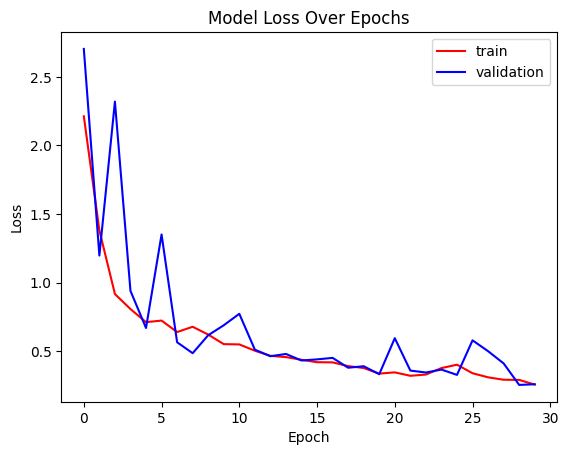

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

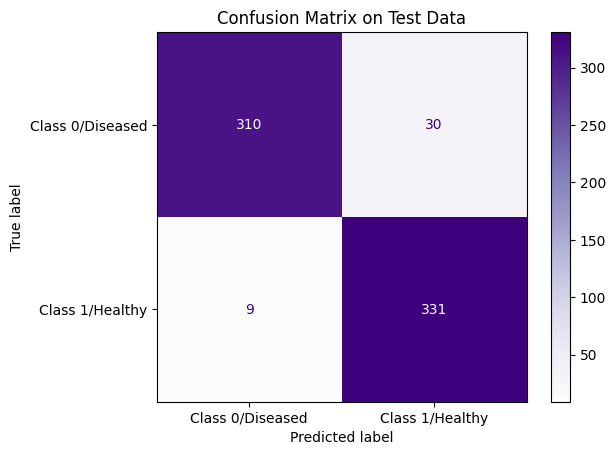

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Get true labels from test_ds
y_true = np.concatenate([y.numpy() for x, y in test_ds], axis=0)
print(y_true)

# Step 2: Get predictions from the model
y_pred_probs = model.predict(test_ds)
print(y_pred_probs)

y_pred = (y_pred_probs > 0.5).astype("int32").flatten()  # Threshold for binary classification

# Step 3: Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Step 4: Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0/Diseased", "Class 1/Healthy"])
disp.plot(cmap=plt.cm.Purples)
plt.title("Confusion Matrix on Test Data")
plt.show()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("F1 Score:", f1_score(y_true, y_pred))

# Step 4: Detailed classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["Class 0/Diseased", "Class 1/Healthy"]))

Accuracy: 0.9426470588235294
Precision: 0.9168975069252078
Recall: 0.9735294117647059
F1 Score: 0.9443651925820257

Classification Report:
                  precision    recall  f1-score   support

Class 0/Diseased       0.97      0.91      0.94       340
 Class 1/Healthy       0.92      0.97      0.94       340

        accuracy                           0.94       680
       macro avg       0.94      0.94      0.94       680
    weighted avg       0.94      0.94      0.94       680



Training on Dataset 2

In [ ]:
!pip install split-folders

import splitfolders

# Your dataset directory
data_dir = '/content/Augmented_Dataset2'

# Split into 60% train, 40% val
splitfolders.ratio(data_dir,
                   output="Train_Dataset_2",
                   seed=42,
                   ratio=(0.6,0.4))

Copying files: 5000 files [00:05, 974.72 files/s] 


In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/GLD_Binary_Classification.h5')

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 4,097,089 (15.63 MB)

 Trainable params: 4,095,105 (15.62 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [ ]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/Train_Dataset_2/train',
    labels='inferred',
    label_mode='int',
    batch_size=16,
    image_size=(256,256),
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/Train_Dataset_2/val',
    labels='inferred',
    label_mode='int',
    batch_size=16,
    shuffle=False,
    image_size=(256,256),
)

Found 3000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [ ]:
#Normalize
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [ ]:
history=model.fit(train_ds,epochs=20,validation_data=validation_ds)

Epoch 1/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 33s 115ms/step - accuracy: 0.9244 - loss: 0.3674 - val_accuracy: 0.9005 - val_loss: 0.2634
Epoch 2/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 27s 76ms/step - accuracy: 0.9681 - loss: 0.1913 - val_accuracy: 0.9575 - val_loss: 0.5512
Epoch 3/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 24s 97ms/step - accuracy: 0.9542 - loss: 0.2394 - val_accuracy: 1.0000 - val_loss: 0.0483
Epoch 4/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - accuracy: 0.9877 - loss: 0.0854 - val_accuracy: 0.9955 - val_loss: 0.0551
Epoch 5/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - accuracy: 0.9981 - loss: 0.0520 - val_accuracy: 0.9970 - val_loss: 0.0423
Epoch 6/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step - accuracy: 0.9937 - loss: 0.0579 - val_accuracy: 0.9380 - val_loss: 0.2007
Epoch 7/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 20s 69ms/step - accuracy: 0.9907 - loss: 0.0819 - val_accuracy: 0.9980 - val_loss: 0.0400
Epoch 8/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 21s 73ms/step - accuracy: 0.9910 - loss: 0.0857 -

In [ ]:
from keras.models import load_model
model.save('GLD_Binary_Classification_2.h5')

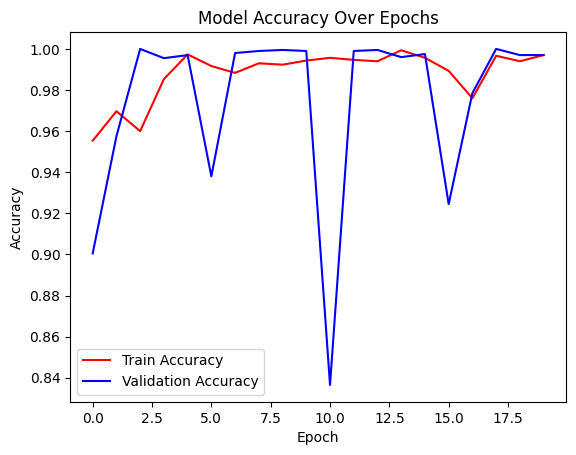

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

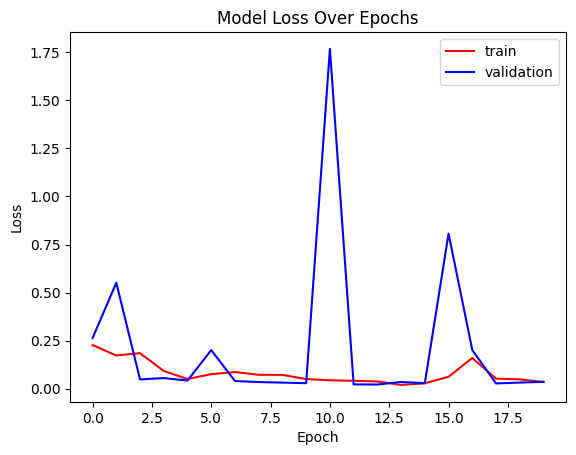

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Training on Dataset 3

In [ ]:
!pip install split-folders

import splitfolders

# Your dataset directory
data_dir = '/content/Augmented_Dataset'

# Split into 50% train, 30% val, 20% test
splitfolders.ratio(data_dir,
                   output="Train_Dataset_3",
                   seed=42,
                   ratio=(0.5,0.3,0.2))

Copying files: 20000 files [00:35, 564.27 files/s] 


In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/GLD_Binary_Classification_2.h5')

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 4,097,089 (15.63 MB)

 Trainable params: 4,095,105 (15.62 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [ ]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/Train_Dataset_3/train',
    labels='inferred',
    label_mode='int',
    batch_size=16,
    image_size=(256,256),
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/Train_Dataset_3/val',
    labels='inferred',
    label_mode='int',
    batch_size=16,
    shuffle=False,
    image_size=(256,256),
)
test_ds=keras.utils.image_dataset_from_directory(
    directory='/content/Train_Dataset_3/test',
    labels='inferred',
    label_mode='int',
    batch_size=16,
    shuffle=False,
    image_size=(256,256),
)

Found 10000 files belonging to 2 classes.
Found 6000 files belonging to 2 classes.
Found 4000 files belonging to 2 classes.


In [ ]:
#Normalize
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)
test_ds=test_ds.map(process)

In [ ]:
history=model.fit(train_ds,epochs=30,validation_data=validation_ds)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 111s 147ms/step - accuracy: 0.8705 - loss: 0.5596 - val_accuracy: 0.9187 - val_loss: 0.2529
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 90s 144ms/step - accuracy: 0.9164 - loss: 0.2673 - val_accuracy: 0.9130 - val_loss: 0.2505
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 88s 141ms/step - accuracy: 0.9200 - loss: 0.2544 - val_accuracy: 0.9307 - val_loss: 0.2106
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 125s 114ms/step - accuracy: 0.9307 - loss: 0.2320 - val_accuracy: 0.9518 - val_loss: 0.1686
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 118ms/step - accuracy: 0.9209 - loss: 0.3269 - val_accuracy: 0.8457 - val_loss: 0.4184
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 88s 142ms/step - accuracy: 0.9363 - loss: 0.2014 - val_accuracy: 0.8532 - val_loss: 0.4995
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 128s 119ms/step - accuracy: 0.9309 - loss: 0.2259 - val_accuracy: 0.8095 - val_loss: 0.5709
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 98s 145ms/step - accuracy: 0.9233 - loss

In [ ]:
from keras.models import load_model
model.save('GLD_Binary_Classification_Final.h5')

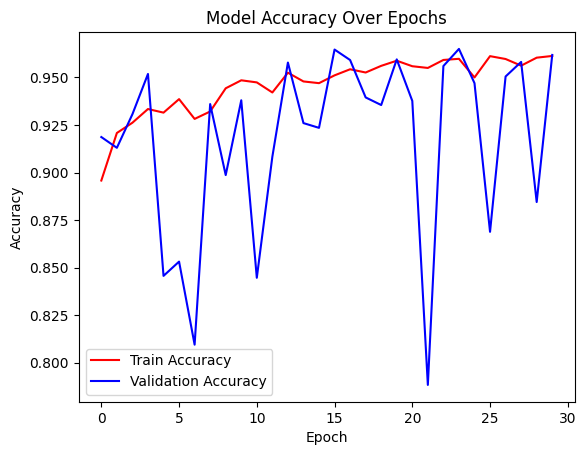

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

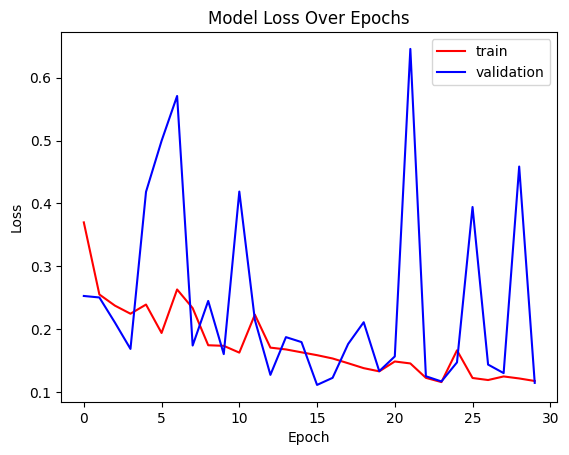

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

[0 0 0 ... 1 1 1]
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 68ms/step
[[3.6953779e-23]
 [0.0000000e+00]
 [1.3889989e-14]
 ...
 [9.9592942e-01]
 [9.9953389e-01]
 [9.9978131e-01]]


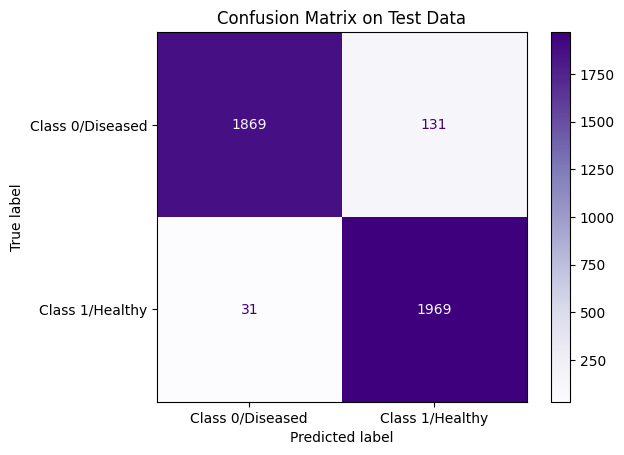

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Get true labels from test_ds
y_true = np.concatenate([y.numpy() for x, y in test_ds], axis=0)
print(y_true)

# Step 2: Get predictions from the model
y_pred_probs = model.predict(test_ds)
print(y_pred_probs)

y_pred = (y_pred_probs > 0.5).astype("int32").flatten()  # Threshold for binary classification

# Step 3: Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Step 4: Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0/Diseased", "Class 1/Healthy"])
disp.plot(cmap=plt.cm.Purples)
plt.title("Confusion Matrix on Test Data")
plt.show()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("F1 Score:", f1_score(y_true, y_pred))

# Step 4: Detailed classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["Class 0/Diseased", "Class 1/Healthy"]))

Accuracy: 0.9595
Precision: 0.9376190476190476
Recall: 0.9845
F1 Score: 0.9604878048780487

Classification Report:
                  precision    recall  f1-score   support

Class 0/Diseased       0.98      0.93      0.96      2000
 Class 1/Healthy       0.94      0.98      0.96      2000

        accuracy                           0.96      4000
       macro avg       0.96      0.96      0.96      4000
    weighted avg       0.96      0.96      0.96      4000



Testing on Base Paper Dataset

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/GLD_Binary_Classification_Final.h5')

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 4,097,089 (15.63 MB)

 Trainable params: 4,095,105 (15.62 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [ ]:
test_ds=keras.utils.image_dataset_from_directory(
    directory='/content/Test_Data',
    labels='inferred',
    label_mode='int',
    batch_size=16,
    shuffle=False,
    image_size=(256,256),
)

Found 8800 files belonging to 2 classes.


In [ ]:
#Normalize
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

test_ds=test_ds.map(process)

[0 0 0 ... 1 1 1]
550/550 ━━━━━━━━━━━━━━━━━━━━ 372s 674ms/step
[[9.1645797e-10]
 [2.1895446e-04]
 [2.4268078e-02]
 ...
 [9.8777962e-01]
 [9.9582618e-01]
 [9.9226910e-01]]


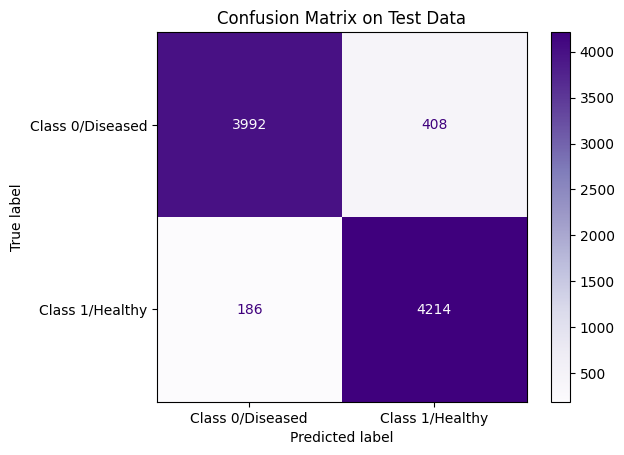

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Get true labels from test_ds
y_true = np.concatenate([y.numpy() for x, y in test_ds], axis=0)
print(y_true)
# Step 2: Get predictions from the model
y_pred_probs = model.predict(test_ds)
print(y_pred_probs)
y_pred = (y_pred_probs > 0.5).astype("int32").flatten()  # Threshold for binary classification

# Step 3: Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Step 4: Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0/Diseased", "Class 1/Healthy"])
disp.plot(cmap=plt.cm.Purples)
plt.title("Confusion Matrix on Test Data")
plt.show()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("F1 Score:", f1_score(y_true, y_pred))

# Step 4: Detailed classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["Class 0/Diseased", "Class 1/Healthy"]))

Accuracy: 0.9325
Precision: 0.911726525313717
Recall: 0.9577272727272728
F1 Score: 0.9341609399246287

Classification Report:
                  precision    recall  f1-score   support

Class 0/Diseased       0.96      0.91      0.93      4400
 Class 1/Healthy       0.91      0.96      0.93      4400

        accuracy                           0.93      8800
       macro avg       0.93      0.93      0.93      8800
    weighted avg       0.93      0.93      0.93      8800



Test ON Another Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving GLD_Binary_Classification_Final.h5 to GLD_Binary_Classification_Final.h5


In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/GLD_Binary_Classification_Final.h5')

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 4,097,089 (15.63 MB)

 Trainable params: 4,095,105 (15.62 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [ ]:
test_ds=keras.utils.image_dataset_from_directory(
    directory='/content/Test_Data_1',
    labels='inferred',
    label_mode='int',
    batch_size=16,
    shuffle=False,
    image_size=(256,256),
)

Found 2260 files belonging to 2 classes.


In [ ]:
#Normalize
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

test_ds=test_ds.map(process)

[0 0 0 ... 1 1 1]
142/142 ━━━━━━━━━━━━━━━━━━━━ 184s 1s/step
[[2.5876534e-01]
 [2.2105376e-30]
 [1.9445367e-15]
 ...
 [9.9999988e-01]
 [9.9991262e-01]
 [9.9999964e-01]]


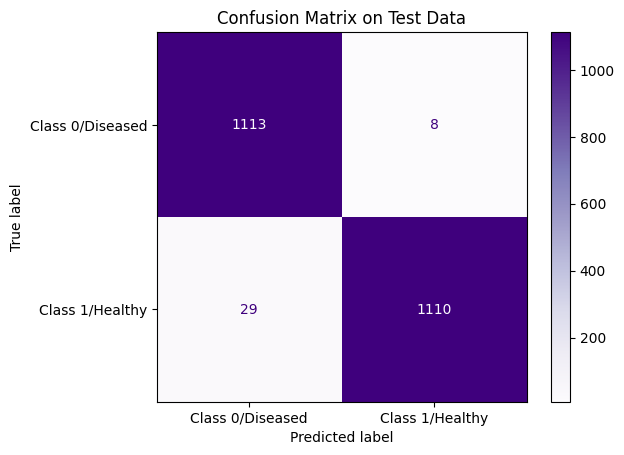

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Get true labels from test_ds
y_true = np.concatenate([y.numpy() for x, y in test_ds], axis=0)
print(y_true)
# Step 2: Get predictions from the model
y_pred_probs = model.predict(test_ds)
print(y_pred_probs)
y_pred = (y_pred_probs > 0.5).astype("int32").flatten()  # Threshold for binary classification

# Step 3: Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Step 4: Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0/Diseased", "Class 1/Healthy"])
disp.plot(cmap=plt.cm.Purples)
plt.title("Confusion Matrix on Test Data")
plt.show()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("F1 Score:", f1_score(y_true, y_pred))

# Step 4: Detailed classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["Class 0/Diseased", "Class 1/Healthy"]))

Accuracy: 0.9836283185840708
Precision: 0.9928443649373881
Recall: 0.974539069359087
F1 Score: 0.9836065573770492

Classification Report:
                  precision    recall  f1-score   support

Class 0/Diseased       0.97      0.99      0.98      1121
 Class 1/Healthy       0.99      0.97      0.98      1139

        accuracy                           0.98      2260
       macro avg       0.98      0.98      0.98      2260
    weighted avg       0.98      0.98      0.98      2260

